#### Import Library

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

##### Proses Kontur

In [57]:
# Membaca gambar
gambar = cv2.imread('gambar.jpg')

# Konversi gambar ke skala abu-abu
abu_abu = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)

# Melakukan operasi deteksi tepi pada gambar
tanda_tepi = cv2.Canny(abu_abu, 30, 150)

# Mencari kontur pada gambar
kontur, _ = cv2.findContours(tanda_tepi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Salinan gambar asli
gambar_asli = np.copy(gambar)

# Salinan gambar asli dengan latar belakang putih
gambar_putih = np.ones_like(gambar) * 255

# Deteksi bentuk benda
for cnt in kontur:
    
    # Menghitung jumlah sudut pada kontur
    sudut = cv2.approxPolyDP(cnt, 0.04 * cv2.arcLength(cnt, True), True)
    jumlah_sudut = len(sudut)
    
    # Deteksi bentuk persegi
    if jumlah_sudut == 4:
        cv2.drawContours(gambar_putih, [cnt], -1, (0, 0, 255), 2)
        cv2.drawContours(gambar_asli, [cnt], -1, (0, 0, 255), 2)

gambar_putih_flip = cv2.flip(gambar_putih, 0)

##### Menampilkan Gambar

Text(0.5, 1.0, 'Gambar dengan Bentuk Benda Terdeteksi')

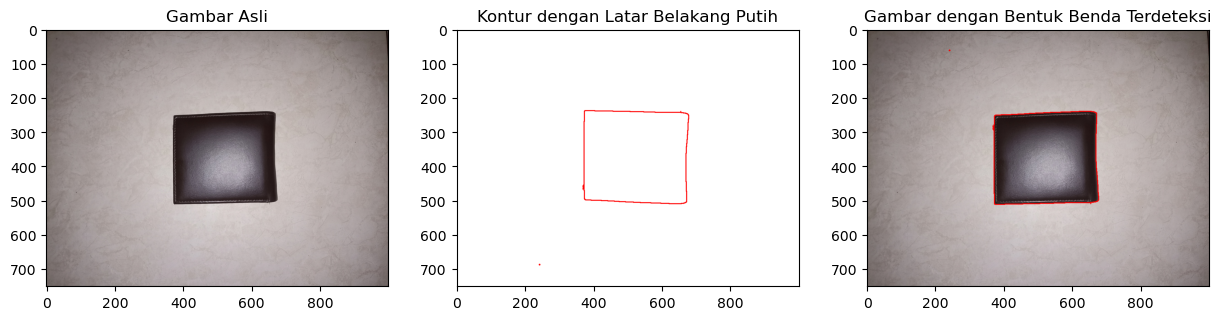

In [58]:
# Menampilkan gambar dalam subplot
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

# Menampilkan gambar asli pada subplot pertama
ax[0].imshow(cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB))
ax[0].set_title('Gambar Asli')

# Menampilkan gambar kontur pada latar belakang putih pada subplot ketiga
ax[1].imshow(cv2.cvtColor(gambar_putih_flip, cv2.COLOR_BGR2RGB))
ax[1].set_title('Kontur dengan Latar Belakang Putih')

# Menampilkan gambar dengan bentuk benda yang terdeteksi pada subplot kedua
ax[2].imshow(cv2.cvtColor(gambar_asli, cv2.COLOR_BGR2RGB))
ax[2].set_title('Gambar dengan Bentuk Benda Terdeteksi')